In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# all the models i am gonna try for the price prediction 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Load data
cars = pd.read_csv("cars24data.csv")
cars.sample(2)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
1233,2023 Maruti Swift VXI,733000,2023,1197,Yes,Manual,9075,1,Petrol,2,0
1135,2020 Maruti Ciaz DELTA 1.5 SHVS MT PETROL,779000,2020,1462,No,Manual,60741,1,Petrol,9,2


In [79]:
# we give every model a code instead of the string names
cars['Model Name Code'] = cars['Model Name'].astype('category').cat.codes
cars.sample(2)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts,Model Name Code
82,2019 Maruti Ciaz DELTA AT 1.5 SHVS PETROL,717000,2019,1462,No,Automatic,55281,1,Petrol,3,4,326
841,2020 Maruti Celerio LXI (O),374000,2020,998,Yes,Manual,54485,1,Petrol,31,6,373


In [80]:
# We define X and Y
X = cars[['Model Name Code', 'Manufacturing_year', 'KM driven', 'Imperfections', 'Ownership']]
Y = cars['Price']   

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# calculate the metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  116755.77
MSE:  21928839786.24
RMSE: 148083.89
R²:   0.34


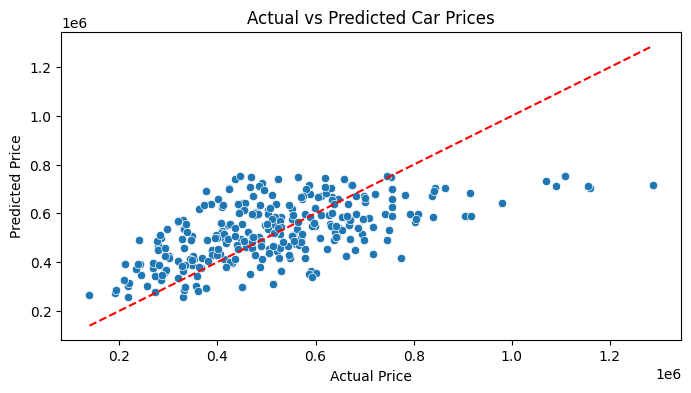

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()


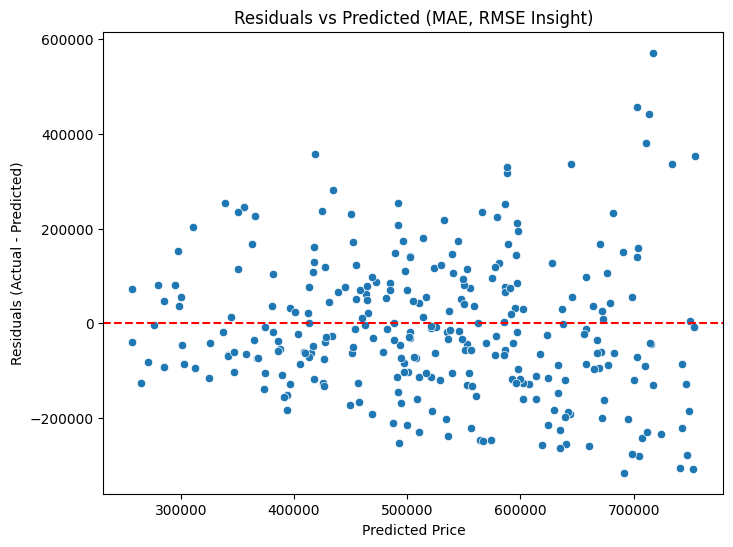

In [83]:
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (MAE, RMSE Insight)')
plt.show()


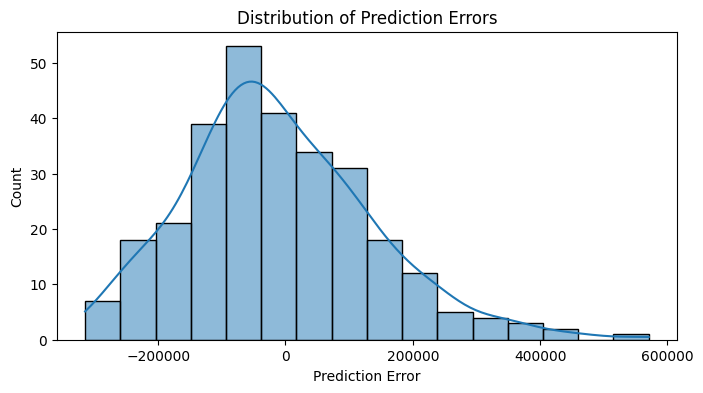

In [84]:
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()


In [93]:
# Try second model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# calculate the metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  143240.83
MSE:  33632004844.29
RMSE: 183390.31
R²:   -0.01


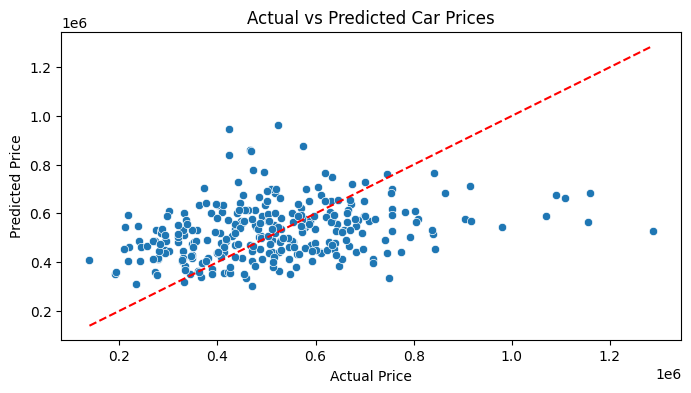

In [94]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

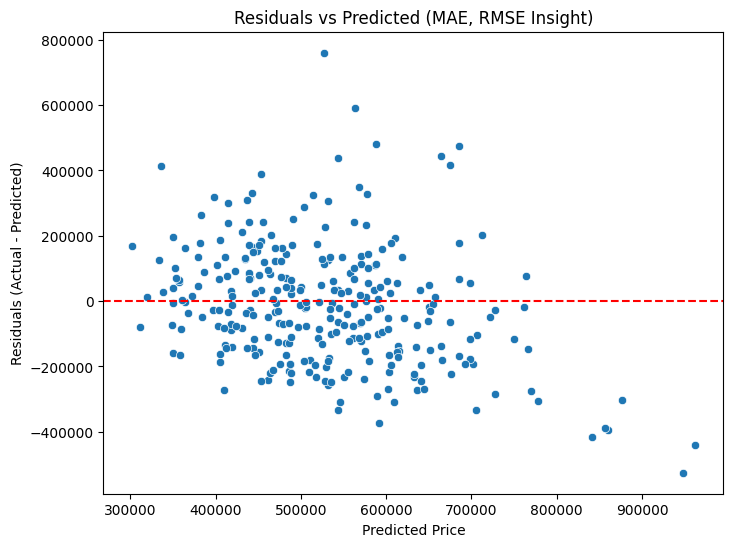

In [96]:
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (MAE, RMSE Insight)')
plt.show()

In [99]:
# Try second model
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# calculate the metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  59326.16
MSE:  7487280994.46
RMSE: 86529.08
R²:   0.78


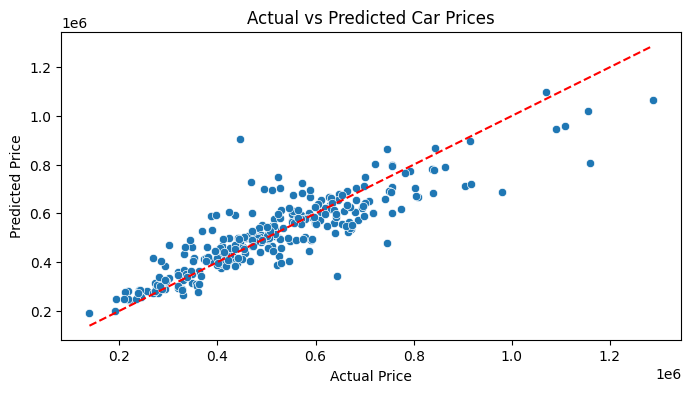

In [100]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

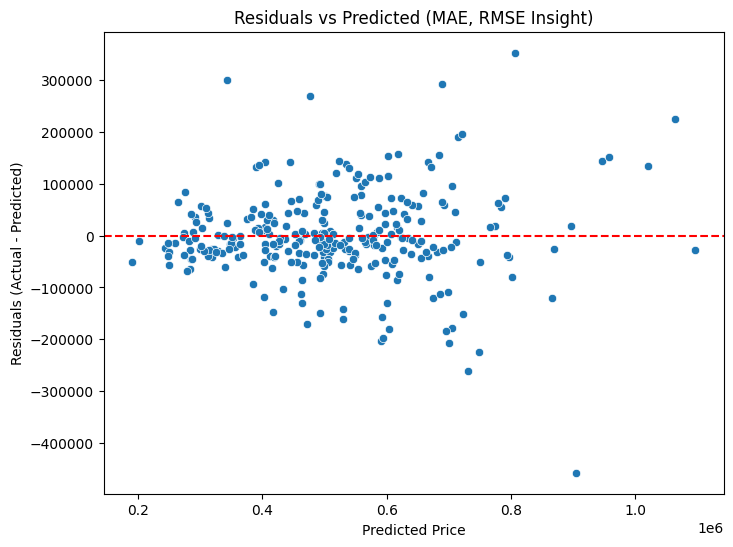

In [101]:
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (MAE, RMSE Insight)')
plt.show()

In [103]:
# Try second model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# calculate the metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  84718.01
MSE:  11562458728.08
RMSE: 107528.87
R²:   0.65


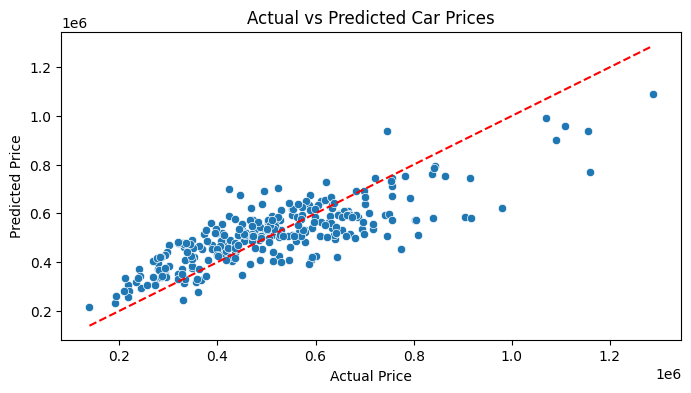

In [104]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

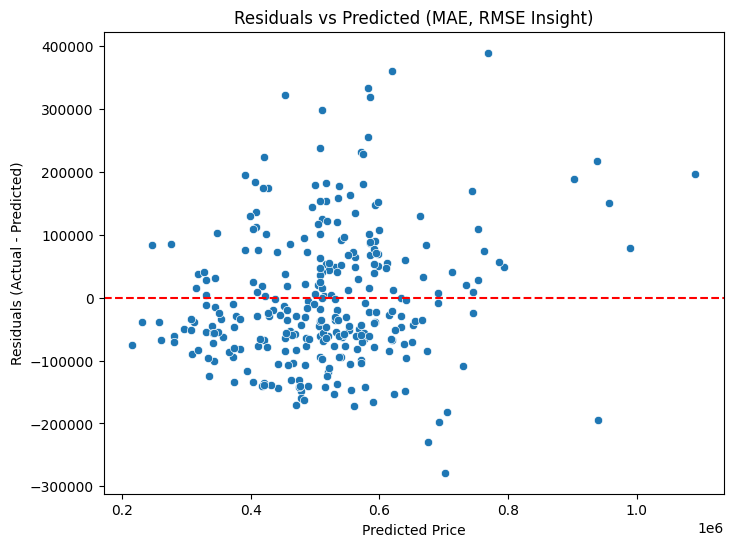

In [105]:
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (MAE, RMSE Insight)')
plt.show()